In [7]:
import numpy as np
from qiskit import *
nqubits=3
circuit=QuantumCircuit(nqubits,nqubits) 


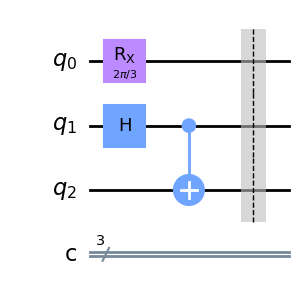

In [8]:
circuit.h(1) #q1 = uniform superposition state
circuit.cx(1,2) #q1=control, q2=target
##Create the ‘secret’ quantum state |y> on qubit q0
circuit.rx(2*np.pi/3,0) # q0 in cos(2p/6)|0>-i sin(2p/6)|1>
circuit.barrier() #vertical separator for circuit drawing
circuit.draw(output='mpl')


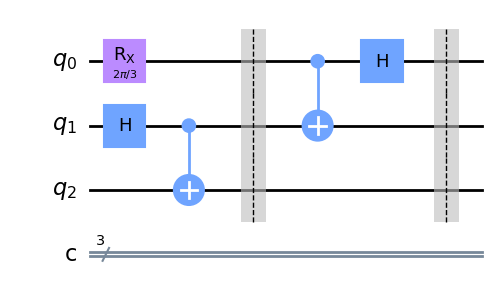

In [9]:
circuit.cx(0,1) #q0=control, q1=target
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')


In [10]:
circuit.cx(1,2) #if d=1 on q1 then apply X on q2 else do nothing.
circuit.cz(0,2) #if c=1 on q0 then apply Z on q2 else do nothing

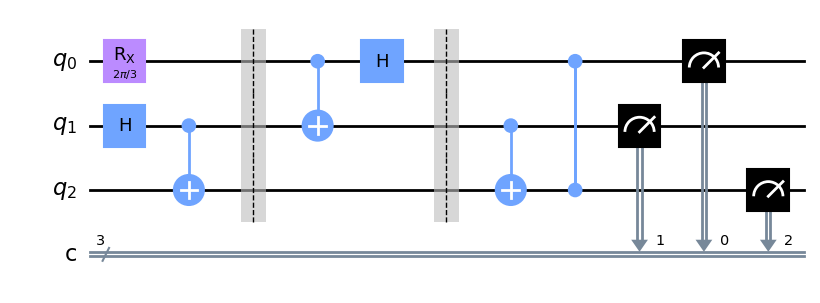

In [11]:
circuit.measure([0,1,2], [0,1,2]) #measure q2 to c0
circuit.draw(output='mpl')


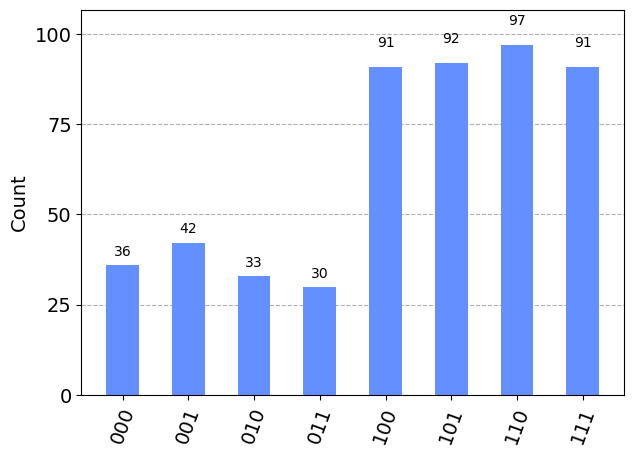

In [12]:
simulator=Aer.get_backend('qasm_simulator')
sim_job=execute(circuit,backend=simulator,shots=512)
sim_result=sim_job.result()
from qiskit.visualization import plot_histogram
##Now, plot |a|2 and |b|2 of the teleported state |y>=a|0>+b|1> 
plot_histogram(sim_result.get_counts(circuit))


# 